# Plotting with Python

This notebook will introduce some of the basic plotting functionality provided by the python package *matplotlib*. Matplotlib (matlab plotting library) provides much of the same plotting tools that Matlab provides, just with a few changes.

Handling plots in iPython notebooks is sufficiently different from the command-line that non-notebook versions of this code are also available. See *plotting_1d_visible.py* and *plotting_1d_invisible.py* for those examples.

In [1]:
# Install cmocean
!sudo pip3 install cmocean

The directory '/u/bastorer/.cache/pip/http' or its parent directory is not owned by the current user and the cache has been disabled. Please check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.
The directory '/u/bastorer/.cache/pip' or its parent directory is not owned by the current user and caching wheels has been disabled. check the permissions and owner of that directory. If executing pip with sudo, you may want sudo's -H flag.


In [2]:
# First, we import the package
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
    # This only works with iPython notebooks, 
    # and makes the plots appear inline, 
    # instead of popping up in a new window.
import cmocean

# We need to import an extra tool for log colour bars (below)
from matplotlib.colors import LogNorm

## 1D Plotting

First, let's take a look at line plotting. We'll do some basic curves.

In [3]:
x = np.linspace(0,4*np.pi,100)
sinx = np.sin(x)
ord1 = x
ord2 = ord1 - (1./np.math.factorial(3))*x**3
ord3 = ord2 + (1./np.math.factorial(5))*x**5
ord4 = ord3 - (1./np.math.factorial(7))*x**7

(-2, 2)

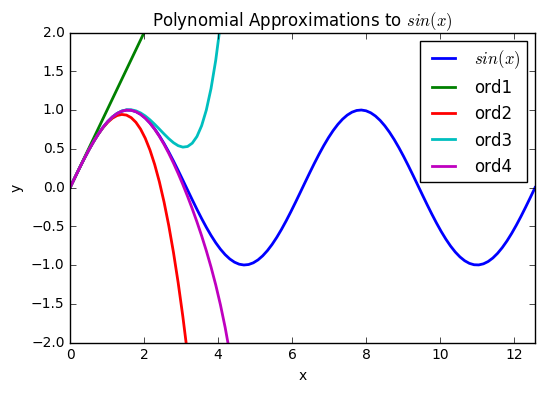

In [4]:
plt.figure()                                      # Create a new figure
plt.plot(x, sinx, label='$sin(x)$', linewidth=2)  # Plot the sine curve
plt.plot(x, ord1, label='ord1', linewidth=2)      # Plot first approx
plt.plot(x, ord2, label='ord2', linewidth=2)      # Plot second approx
plt.plot(x, ord3, label='ord3', linewidth=2)      # Plot third approx
plt.plot(x, ord4, label='ord4', linewidth=2)      # Plot fourth approx
plt.legend(loc='best')                            # Add a legend (uses the labels given above) 
plt.axis('tight')                                 # Tighten the axes to fit perfectly
plt.title('Polynomial Approximations to $sin(x)$')# Add a title
plt.xlabel('x')                                   # Add x label
plt.ylabel('y')                                   # Add y label
plt.ylim(-2,2)                                    # Manually tighten vertical axis

As we can see, plotting is very similar to Matlab. If we had wanted to, we could have combined all of the plot commands into one line:

    plt.plot(x, sinx, x, ord1, x, ord2, x, ord3, x, ord4)
  
Unfortunately, doing so means that we can no longer use the keyword argument ``label``. We could, however, specify the labels in the ``legend`` call.

Notice, too, that we can add use TeX for format our legend entries, title, and labels.

We can also specify line type as we would in Matlab, except that now we have even more options!

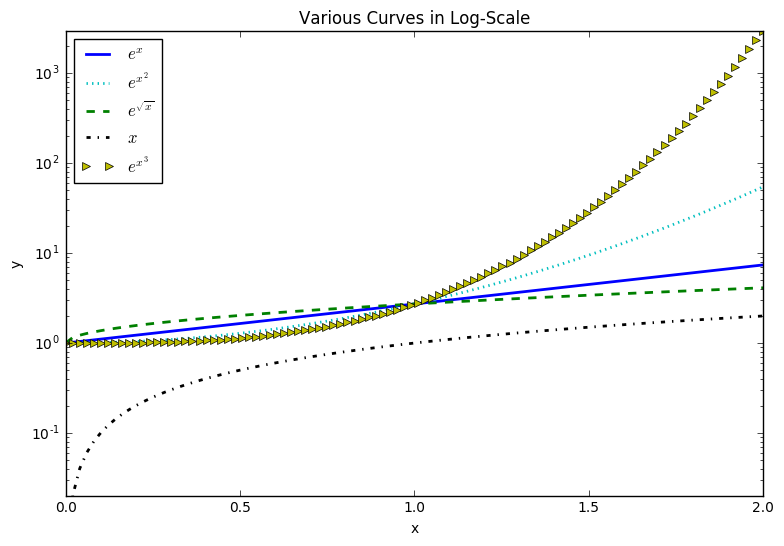

In [5]:
plt.figure(figsize=(9,6))    
x = np.linspace(0,2,100)
plt.plot(x, np.exp(x), "-b", linewidth=2, label='$e^x$')
plt.plot(x, np.exp(x**2), ":c", linewidth=2, label='$e^{x^2}$')  
plt.plot(x, np.exp(np.sqrt(x)), "--g", linewidth=2, label='$e^{\\sqrt{x}}$')      
plt.plot(x, x, "-.k", linewidth=2, label='$x$')      
plt.plot(x, np.exp(x**3), ">y", linewidth=2, label='$e^{x^3}$')     
plt.yscale('log')        
plt.legend(loc='best')
plt.axis('tight')                                 
plt.title('Various Curves in Log-Scale')
plt.xlabel('x')                                   
plt.ylabel('y')                                   

## 2D Plotting

As with 1D plotting, the matplotlib package provides the typical Matlab plotting tools (pcolor, contour, contouf), but with a few nice additions. Let's start by creating some data to plot. For this purpose, we will use the ``meshgrid`` option. By default, ``meshgrid`` using Matlab indexing so that the plots don't appear transposed (matplotlib also inherited Matlab's funky plot indexing...)

In [6]:
x = np.linspace(0,1,100)
y = np.linspace(0,1,100)
X,Y = np.meshgrid(x,y)
Z = np.cos(X + Y*(1 + np.cos(X)))*np.sin(Y)

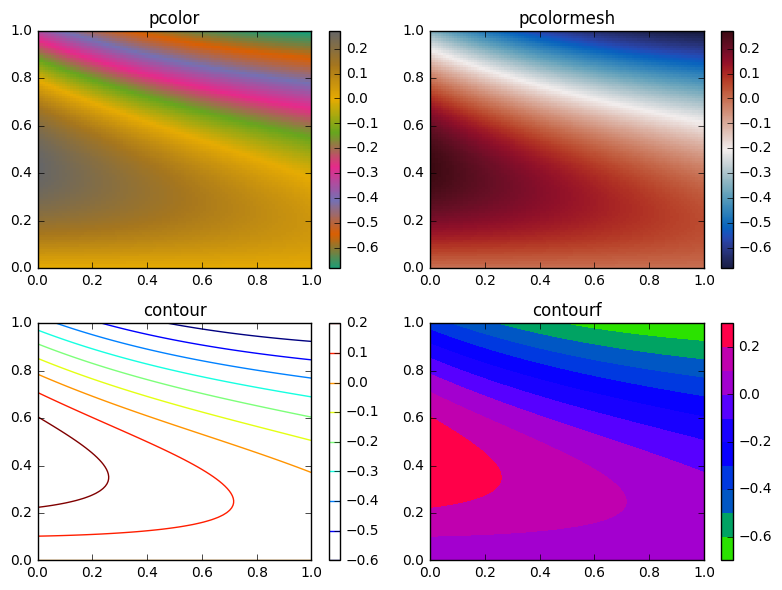

In [7]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
plt.pcolor(X,Y,Z,cmap='Dark2')
plt.title('pcolor')
plt.colorbar()

plt.subplot(2,2,2)
plt.pcolormesh(X,Y,Z,cmap=cmocean.cm.balance)
plt.title('pcolormesh')
plt.colorbar()

plt.subplot(2,2,3)
plt.contour(X,Y,Z,10,cmap='jet')
plt.title('contour')
plt.colorbar()

plt.subplot(2,2,4)
plt.contourf(X,Y,Z,10,cmap='prism')
plt.title('contourf')
plt.colorbar()

plt.tight_layout()  # This cleans up the layout. Try removing it and see what happens
                    # It's especially useful when you have several plots, each of which
                    # titles, x-, and y-labels.

Here we've introduced a few things.

1. If we want to create a figure that's larger than the default, we can simply specify the ``figsize`` option when we create our figure.
2. Creating subplots works much the same way as in Matlab. Note that while python typically uses 0-indexing, the subplots are 1-indexed.
3. The matplotlib colormap options are pretty extensive (http://matplotlib.org/examples/color/colormaps_reference.html).
4. There's an extra plot option that isn't in Matlab: ``pcolormesh``. ``pcolormesh`` is an optimized plotter when using grid meshes (i.e. any grid that can be generated using gridmesh, that does mean that ``x`` and ``y`` must be independent, but they need not be uniform). This only really matters if you are doing a lot of plotting with high resolution grids.

Note that pcolor and pcolormesh do the same trimming as in Matlab: the last row and column are removed.

For a discussion of colour maps, see the *Notes on Plotting* notebook.

# Tips and Tricks

Matplotlib is a powerful plotting toolbox, and so you can have control of essentially every aspect of your plots. While this means that you can construct any plot that you desire, it does also mean that there are some cumbersome components. Included below are some formatting tips that tricks that may be useful.

### Legends Outside of Plot

The built-in options for legend locations are strictly within the plot domain. In order to have a legend outside of the plotting range, you need to do a bit of re-arranging. Consider the log-plot from before.

In the example below, we use the `tight_layout` command to *squeeze* the original axes into a rectangle that starts in the bottom left (the first two arguments, `0,0`), has 84% of the original width, and 100% of the original height (the last two arguments, `0.84,1`).

The legend is then created *outside* the axes object by specifying that the bounding box is anchored at 100.5% of the horizontal axis and 0% of the vertical axis (the first two arguments), and has appropriate width arguments.

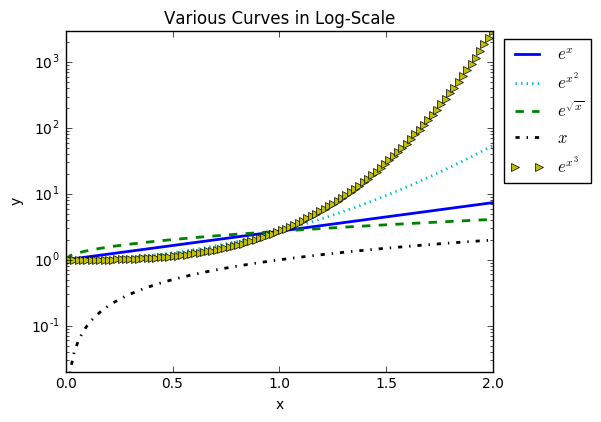

In [8]:
plt.figure()    

x = np.linspace(0,2,100)

plt.plot(x, np.exp(x), "-b", linewidth=2, label='$e^x$')
plt.plot(x, np.exp(x**2), ":c", linewidth=2, label='$e^{x^2}$')  
plt.plot(x, np.exp(np.sqrt(x)), "--g", linewidth=2, label='$e^{\\sqrt{x}}$')      
plt.plot(x, x, "-.k", linewidth=2, label='$x$')      
plt.plot(x, np.exp(x**3), ">y", linewidth=2, label='$e^{x^3}$')  

plt.yscale('log')  

# Now we rescale the plot to fit inside a box that is 84% of the original witdth
# The format for rect is [left_end, bottom_end, width, height]
# Note that the coordinates are given as a proportion of the domain, 
# so that a height of 1 is the full height.
plt.tight_layout(rect=[0,0,0.84,1])

# We add the legend box
# The format for the bbox is the same as rect above. Here we specify
# that the bbox is to start just outside of the plotting box.
plt.legend(loc='upper left', bbox_to_anchor=(1.005,0,0.12/0.84,1.))


plt.axis('tight')                                 
plt.title('Various Curves in Log-Scale')
plt.xlabel('x')                                   
plt.ylabel('y') 

### Log-scale Colour Bars in Pcolor Plots

It's not uncommon to want to plot 2D data on a log-scale.

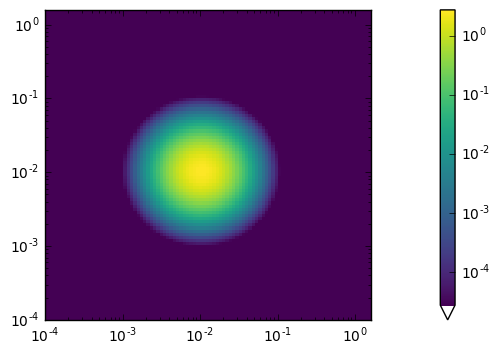

In [9]:
# Now we'll define some data
x = np.logspace(-4,0.2,100)
y = np.logspace(-4,0.2,100)
X,Y = np.meshgrid(x,y)

Z = np.exp( 1 - ((np.log10(X) - -2)/0.3)**2 - ((np.log10(Y) - -2)/0.3)**2)

# Determine the maximum of the plot (i.e. upper bound on colour bar)
cv = np.log10(np.max(np.abs(Z)))

# Also specify number of orders to plot
num_ords = 5

# The LogNorm feature creates a log10 colour bar using the proscribed bounds.
q = plt.pcolormesh(X,Y,Z, cmap='viridis', 
                   norm=LogNorm(vmin=10**(cv-num_ords), vmax=10**cv))

# The remaining commands are standard.
plt.xscale('log')
plt.yscale('log')
plt.axis('tight')
plt.colorbar(q, pad = 0.15, extend='min')

### Log-scale Colour Bars in Pcolor Plots with **Signed** Data

Now suppose that we want to plot some data on a log scale, but the data is signed. Typically, one simply plots the magnitude on a log scale, and provides the sign information seperately. However, by combining two plots onto one, we can present signed data on a log scale.

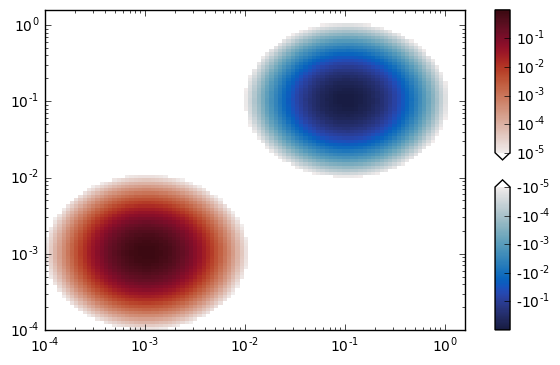

In [10]:
## Extract nice colour maps from cmocean 'balance'
Np = 256
Npb2 = int(Np/2)
bal = cmocean.tools.get_dict(cmocean.cm.balance, N=Np)

bal_red   = [x[2] for x in bal['red']]
bal_blue  = [x[2] for x in bal['blue']]
bal_green = [x[2] for x in bal['green']]

just_red = np.vstack([bal_red[Npb2:], bal_green[Npb2:], bal_blue[Npb2:]]).T
just_blue = np.vstack([bal_red[:Npb2][::-1], bal_green[:Npb2][::-1], bal_blue[:Npb2][::-1]]).T

red_map = cmocean.tools.cmap(just_red, N=Npb2)
blue_map = cmocean.tools.cmap(just_blue, N=Npb2)

red_map.set_under('w')
blue_map.set_under('w')

# We need to define a function first
def add_neg(cax):
    labels = map(lambda st: st[:14] + '-' + st[14:],
                 map(lambda tick: tick.get_text(),
                      cax.get_yticklabels()))
    cax.set_yticklabels(labels)

# Define some data
x = np.logspace(-4,0.2,100)
y = np.logspace(-4,0.2,100)
X,Y = np.meshgrid(x,y)

Z = np.exp( - ((np.log10(X) - -3)/0.3)**2 - ((np.log10(Y) - -3)/0.3)**2) \
    - np.exp( - ((np.log10(X) - -1)/0.3)**2 - ((np.log10(Y) - -1)/0.3)**2)

# Get handles for manipulating the figures
fig = plt.figure()
ax1 = fig.add_axes([0.15,0.1,0.7,0.8])

# Determine the maximum of the plot (i.e. upper bound on colour bar)
cv = np.nanmax(np.log10(np.abs(Z)))

# Now plot the positive and negative parts seperately
q1 = ax1.pcolormesh(X,Y,np.abs(Z)*(Z > 0), cmap=red_map, \
        norm=LogNorm(vmin=10**(cv-num_ords), vmax=10**cv))

q2 = ax1.pcolormesh(X,Y,np.abs(Z)*(Z < 0), cmap=blue_map, \
        norm=LogNorm(vmin=10**(cv-num_ords), vmax=10**cv))

plt.axis('tight')
ax1.set_xscale('log')
ax1.set_yscale('log')

# Now we manually add the colourbars
cax1 = fig.add_axes([0.9,0.525,0.025,0.375])
cax2 = fig.add_axes([0.9,0.1,0.025,0.375])
cbar1 = plt.colorbar(q1, cax=cax1, extend='min')
cbar2 = plt.colorbar(q2, cax=cax2, extend='min')

# Flip the bottom colour bar upside down and add negative signs
add_neg(cax2)
cax2.invert_yaxis()